<a href="https://colab.research.google.com/github/fralfaro/r4ds-book/blob/main/docs/03_%20data_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data visualization 

## Introduction

> "The simple graph has brought more information to the data analyst's mind than any other device." --- John Tukey

This chapter will teach you how to visualize your data using ggplot2.
R has several systems for making graphs, but ggplot2 is one of the most elegant and most versatile.
ggplot2 implements the **grammar of graphics**, a coherent system for describing and building graphs.
With ggplot2, you can do more faster by learning one system and applying it in many places.

If you'd like to learn more about the theoretical underpinnings of ggplot2, I recommend reading "The Layered Grammar of Graphics", <http://vita.had.co.nz/papers/layered-grammar.pdf>.

### Prerequisites

This chapter focuses on ggplot2, one of the core packages in the tidyverse.
To access the datasets, help pages, and functions used in this chapter, load the tidyverse by running this code:


In [1]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()




That one line of code loads the core tidyverse; packages which you will use in almost every data analysis.
It also tells you which functions from the tidyverse conflict with functions in base R (or from other packages you might have loaded).

If you run this code and get the error message "there is no package called 'tidyverse'", you'll need to first install it, then run `library()` once again.


In [2]:
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)





You only need to install a package once, but you need to reload it every time you start a new session.

If we need to be explicit about where a function (or dataset) comes from, we'll use the special form `package::function()`.
For example, `ggplot2::ggplot()` tells you explicitly that we're using the `ggplot()` function from the ggplot2 package.

## First steps

Let's use our first graph to answer a question: Do cars with big engines use more fuel than cars with small engines?
You probably already have an answer, but try to make your answer precise.
What does the relationship between engine size and fuel efficiency look like?
Is it positive?
Negative?
Linear?
Nonlinear?

### The `mpg` data frame

You can test your answer with the `mpg` **data frame** found in ggplot2 (a.k.a. `ggplot2::mpg`).
A data frame is a rectangular collection of variables (in the columns) and observations (in the rows).
`mpg` contains observations collected by the US Environmental Protection Agency on 38 car models.



In [3]:
mpg

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact



Among the variables in `mpg` are:

1.  `displ`, a car's engine size, in liters.

2.  `hwy`, a car's fuel efficiency on the highway, in miles per gallon (mpg).
    A car with a low fuel efficiency consumes more fuel than a car with a high fuel efficiency when they travel the same distance.

To learn more about `mpg`, open its help page by running `?mpg`.

### Creating a ggplot

To plot `mpg`, run this code to put `displ` on the x-axis and `hwy` on the y-axis:



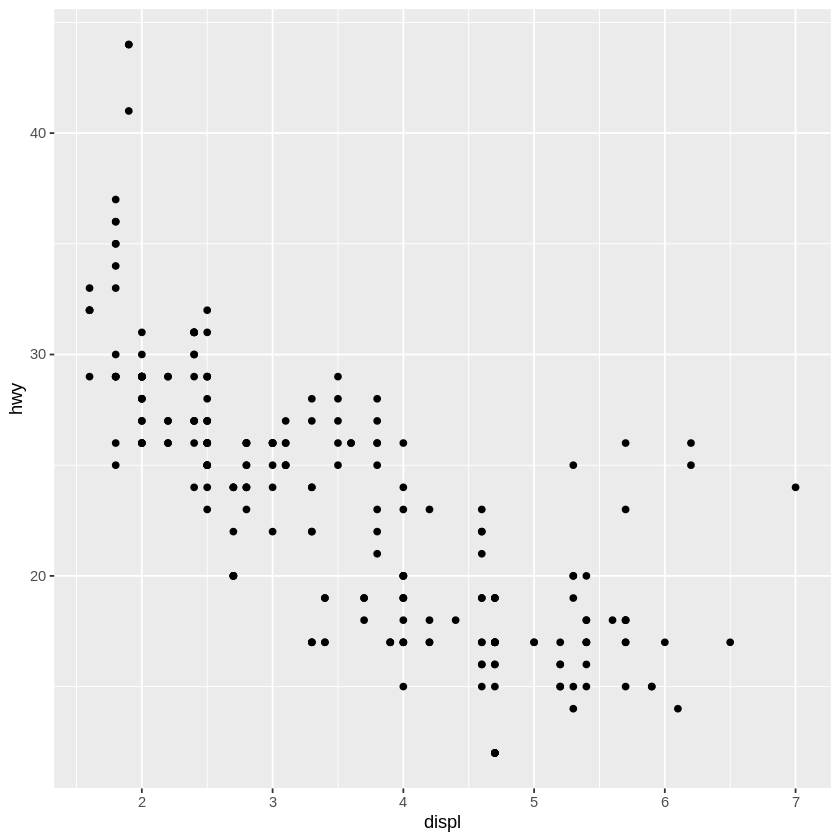

In [4]:
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy))


The plot shows a negative relationship between engine size (`displ`) and fuel efficiency (`hwy`).
In other words, cars with smaller engine sizes have higher fuel efficiency and, in general, as engine size increases, fuel efficiency decreases.
Does this confirm or refute your hypothesis about fuel efficiency and engine size?

With ggplot2, you begin a plot with the function `ggplot()`.
`ggplot()` creates a coordinate system that you can add layers to.
The first argument of `ggplot()` is the dataset to use in the graph.
So `ggplot(data = mpg)` creates an empty graph, but it's not very interesting so I'm not going to show it here.

You complete your graph by adding one or more layers to `ggplot()`.
The function `geom_point()` adds a layer of points to your plot, which creates a scatterplot.
ggplot2 comes with many geom functions that each add a different type of layer to a plot.
You'll learn a whole bunch of them throughout this chapter.

Each geom function in ggplot2 takes a `mapping` argument.
This defines how variables in your dataset are mapped to visual properties of your plot.
The `mapping` argument is always paired with `aes()`, and the `x` and `y` arguments of `aes()` specify which variables to map to the x and y axes.
ggplot2 looks for the mapped variables in the `data` argument, in this case, `mpg`.

### A graphing template

Let's turn this code into a reusable template for making graphs with ggplot2.
To make a graph, replace the bracketed sections in the code below with a dataset, a geom function, or a collection of mappings.



```r
ggplot(data = <DATA>) + 
  <GEOM_FUNCTION>(mapping = aes(<MAPPINGS>))
```



The rest of this chapter will show you how to complete and extend this template to make different types of graphs.
We will begin with the `<MAPPINGS>` component.

### Exercises

1.  Run `ggplot(data = mpg)`.
    What do you see?

2.  How many rows are in `mpg`?
    How many columns?

3.  What does the `drv` variable describe?
    Read the help for `?mpg` to find out.

4.  Make a scatterplot of `hwy` vs `cyl`.

5.  What happens if you make a scatterplot of `class` vs `drv`?
    Why is the plot not useful?

## Aesthetic mappings

> "The greatest value of a picture is when it forces us to notice what we never expected to see." --- John Tukey

In the plot below, one group of points (highlighted in red) seems to fall outside of the linear trend.
These cars have a higher mileage than you might expect.
How can you explain these cars?



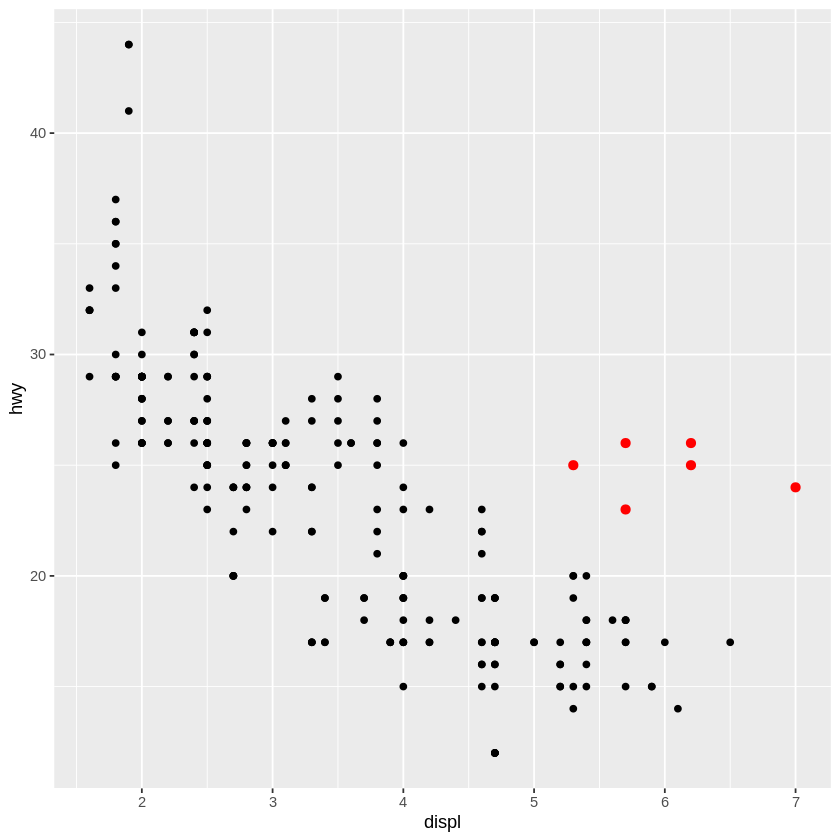

In [5]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
  geom_point() + 
  geom_point(data = dplyr::filter(mpg, displ > 5, hwy > 20), color = "red", size = 2.2)


Let's hypothesize that the cars are hybrids.
One way to test this hypothesis is to look at the `class` value for each car.
The `class` variable of the `mpg` dataset classifies cars into groups such as compact, midsize, and SUV.
If the outlying points are hybrids, they should be classified as compact cars or, perhaps, subcompact cars (keep in mind that this data was collected before hybrid trucks and SUVs became popular).

You can add a third variable, like `class`, to a two dimensional scatterplot by mapping it to an **aesthetic**.
An aesthetic is a visual property of the objects in your plot.
Aesthetics include things like the size, the shape, or the color of your points.
You can display a point (like the one below) in different ways by changing the values of its aesthetic properties.
Since we already use the word "value" to describe data, let's use the word "level" to describe aesthetic properties.
Here we change the levels of a point's size, shape, and color to make the point small, triangular, or blue:



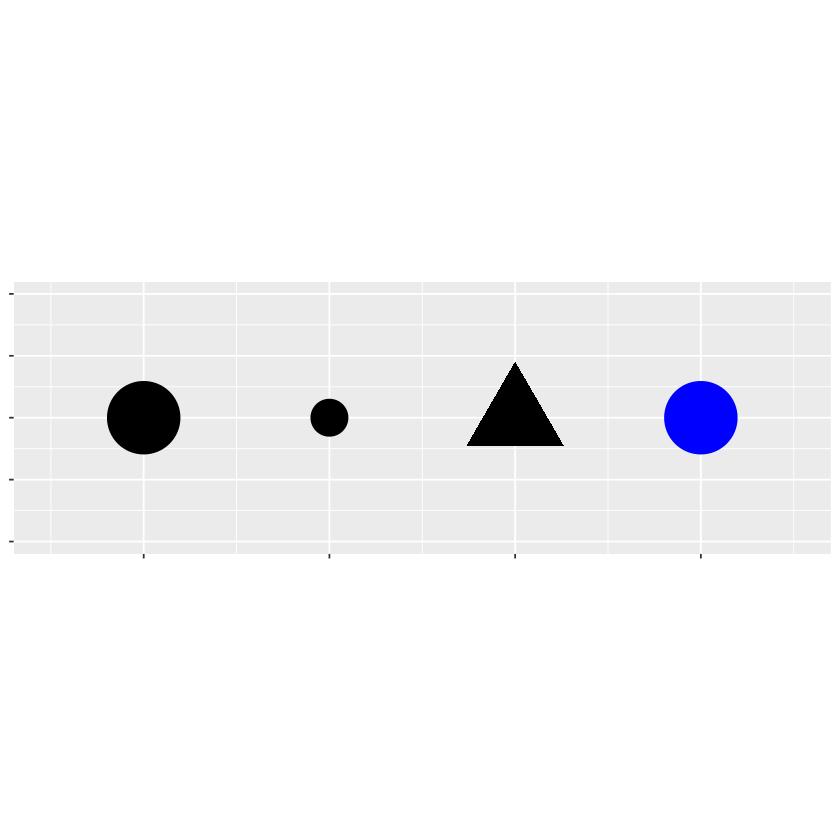

In [6]:
ggplot() +
  geom_point(aes(1, 1), size = 20) +
  geom_point(aes(2, 1), size = 10) + 
  geom_point(aes(3, 1), size = 20, shape = 17) + 
  geom_point(aes(4, 1), size = 20, color = "blue") + 
  scale_x_continuous(NULL, limits = c(0.5, 4.5), labels = NULL) + 
  scale_y_continuous(NULL, limits = c(0.9, 1.1), labels = NULL) + 
  theme(aspect.ratio = 1/3)


You can convey information about your data by mapping the aesthetics in your plot to the variables in your dataset.
For example, you can map the colors of your points to the `class` variable to reveal the class of each car.



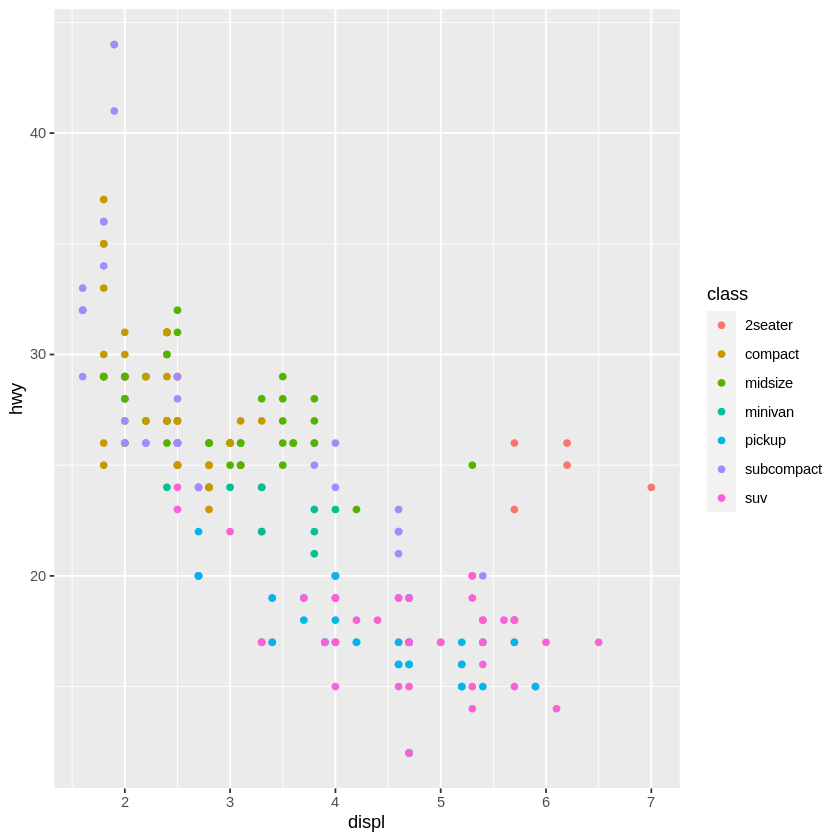

In [7]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = class))


(If you prefer British English, like Hadley, you can use `colour` instead of `color`.)

To map an aesthetic to a variable, associate the name of the aesthetic with the name of the variable inside `aes()`.
ggplot2 will automatically assign a unique level of the aesthetic (here a unique color) to each unique value of the variable, a process known as **scaling**.
ggplot2 will also add a legend that explains which levels correspond to which values.

The colors reveal that many of the unusual points (with engine size greater than 5 liters and highway fuel efficiency greater than 20 miles per gallon) are two-seater cars.
These cars don't seem like hybrids, and are, in fact, sports cars!
Sports cars have large engines like SUVs and pickup trucks, but small bodies like midsize and compact cars, which improves their gas mileage.
In hindsight, these cars were unlikely to be hybrids since they have large engines.

In the above example, we mapped `class` to the color aesthetic, but we could have mapped `class` to the size aesthetic in the same way.
In this case, the exact size of each point would reveal its class affiliation.
We get a *warning* here, because mapping an unordered variable (`class`) to an ordered aesthetic (`size`) is generally not a good idea.



Warning message:
“Using size for a discrete variable is not advised.”


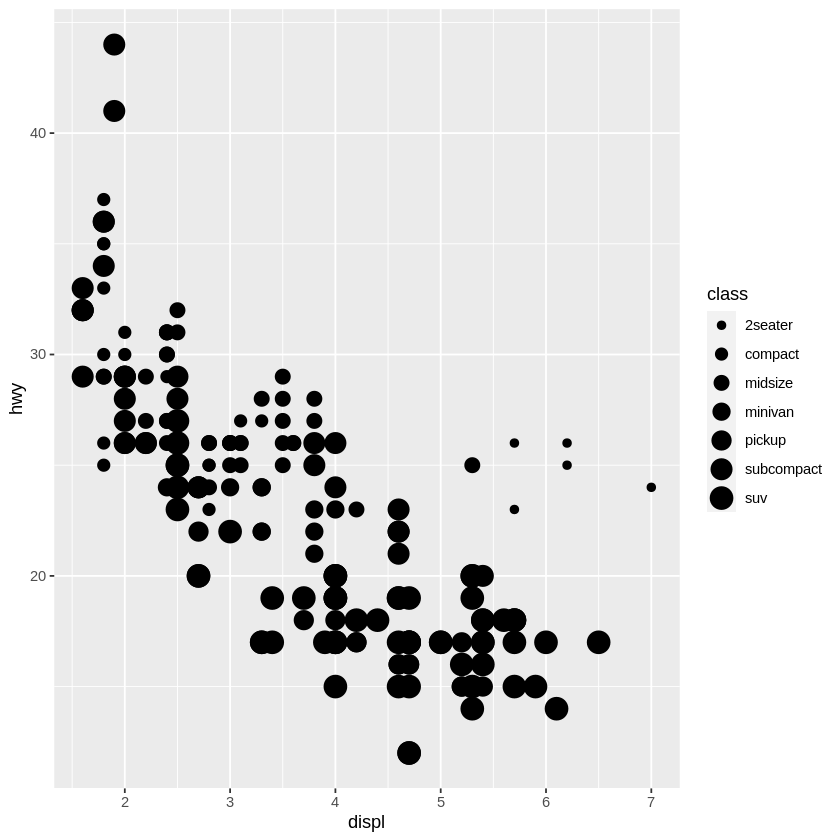

In [8]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, size = class))


Similarly, we could have mapped `class` to the *alpha* aesthetic, which controls the transparency of the points, or to the *shape* aesthetic, which controls the shape of the points.


```r
# Left
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, alpha = class))

# Right
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, shape = class))
```

<img src="https://d33wubrfki0l68.cloudfront.net/f9280bbd15f46cc9d67a8fa30085c147ccee89c4/402ac/visualize_files/figure-html/unnamed-chunk-9-1.png" alt="img R" 
     width="500" height="300"  align="left" >

<img src="https://d33wubrfki0l68.cloudfront.net/1ae399aecbf37c65219a1610aa1b9700a6355834/5d06b/visualize_files/figure-html/unnamed-chunk-9-2.png" alt="img R" 
     width="500" height="300"  align="left" >



What happened to the SUVs?
ggplot2 will only use six shapes at a time.
By default, additional groups will go unplotted when you use the shape aesthetic.

For each aesthetic, you use `aes()` to associate the name of the aesthetic with a variable to display.
The `aes()` function gathers together each of the aesthetic mappings used by a layer and passes them to the layer's mapping argument.
The syntax highlights a useful insight about `x` and `y`: the x and y locations of a point are themselves aesthetics, visual properties that you can map to variables to display information about the data.

Once you map an aesthetic, ggplot2 takes care of the rest.
It selects a reasonable scale to use with the aesthetic, and it constructs a legend that explains the mapping between levels and values.
For x and y aesthetics, ggplot2 does not create a legend, but it creates an axis line with tick marks and a label.
The axis line acts as a legend; it explains the mapping between locations and values.

You can also *set* the aesthetic properties of your geom manually.
For example, we can make all of the points in our plot blue:


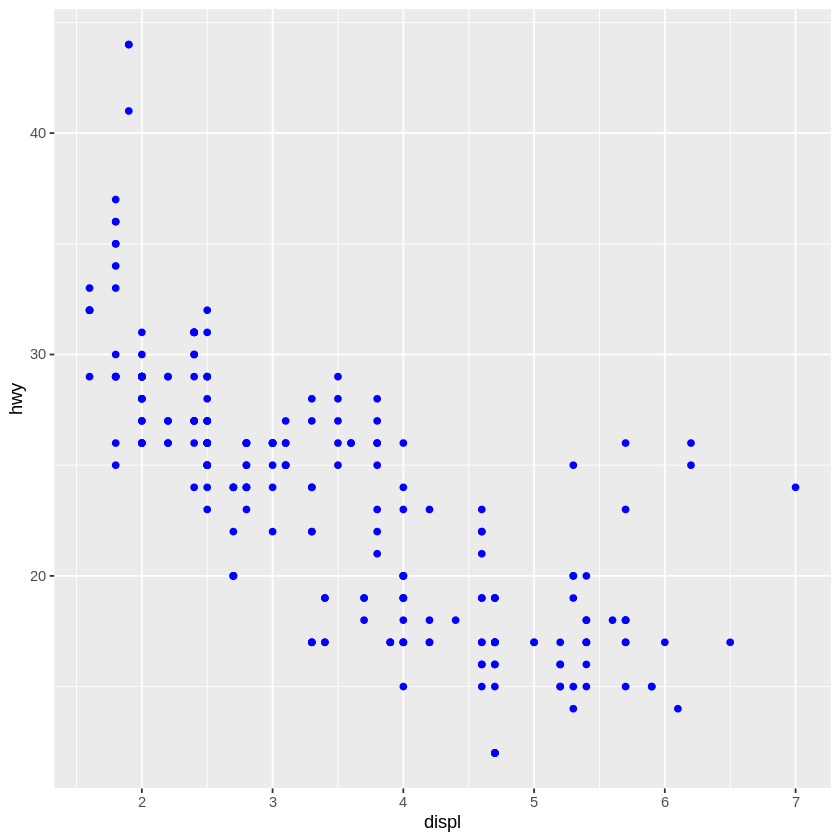

In [9]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy), color = "blue")



Here, the color doesn't convey information about a variable, but only changes the appearance of the plot.
To set an aesthetic manually, set the aesthetic by name as an argument of your geom function.
In other words, it goes *outside* of `aes()`.
You'll need to pick a value that makes sense for that aesthetic:

-   The name of a color as a character string.
-   The size of a point in mm.
-   The shape of a point as a number.


<center>
    <img src="https://d33wubrfki0l68.cloudfront.net/e28a1b57b6622cf67fd8a7e01c6a9955914f8fe9/635be/visualize_files/figure-html/shapes-1.png" alt="img R"  >
    
</center>

> R has 25 built in shapes that are identified by numbers. There are some seeming duplicates: for example, 0, 15, and 22 are all squares. The difference comes from the interaction of the `colour` and `fill` aesthetics. The hollow shapes (0–14) have a border determined by `colour`; the solid shapes (15–20) are filled with `colour`; the filled shapes (21–24) have a border of colour and are filled with `fill`.




### Exercises

1.  What's gone wrong with this code?
    Why are the points not blue?


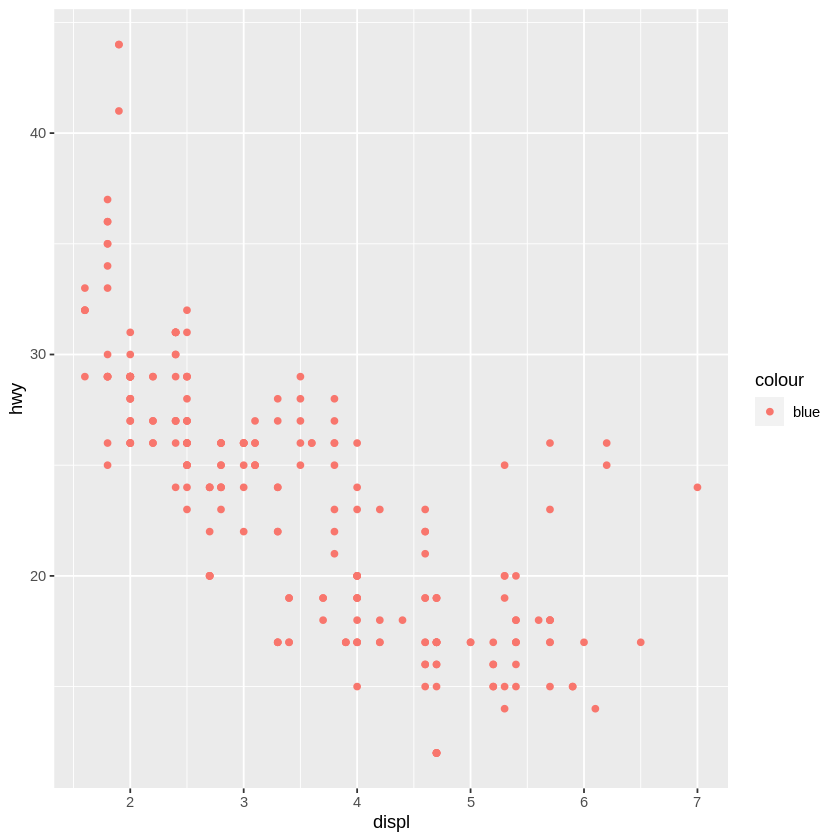

In [12]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = "blue"))


2.  Which variables in `mpg` are categorical?
    Which variables are continuous?
    (Hint: type `?mpg` to read the documentation for the dataset).
    How can you see this information when you run `mpg`?

3.  Map a continuous variable to `color`, `size`, and `shape`.
    How do these aesthetics behave differently for categorical vs. continuous variables?

4.  What happens if you map the same variable to multiple aesthetics?

5.  What does the `stroke` aesthetic do?
    What shapes does it work with?
    (Hint: use `?geom_point`)

6.  What happens if you map an aesthetic to something other than a variable name, like `aes(color = displ < 5)`?
    Note, you'll also need to specify x and y.




## Common problems

As you start to run R code, you're likely to run into problems.
Don't worry --- it happens to everyone.
I have been writing R code for years, and every day I still write code that doesn't work!

Start by carefully comparing the code that you're running to the code in the book.
R is extremely picky, and a misplaced character can make all the difference.
Make sure that every `(` is matched with a `)` and every `"` is paired with another `"`.
Sometimes you'll run the code and nothing happens.
Check the left-hand of your console: if it's a `+`, it means that R doesn't think you've typed a complete expression and it's waiting for you to finish it.
In this case, it's usually easy to start from scratch again by pressing ESCAPE to abort processing the current command.

One common problem when creating ggplot2 graphics is to put the `+` in the wrong place: it has to come at the end of the line, not the start.
In other words, make sure you haven't accidentally written code like this:




```R
ggplot(data = mpg) 
+ geom_point(mapping = aes(x = displ, y = hwy))
```



If you're still stuck, try the help.
You can get help about any R function by running `?function_name` in the console, or selecting the function name and pressing F1 in RStudio.
Don't worry if the help doesn't seem that helpful - instead skip down to the examples and look for code that matches what you're trying to do.

If that doesn't help, carefully read the error message.
Sometimes the answer will be buried there!
But when you're new to R, the answer might be in the error message but you don't yet know how to understand it.
Another great tool is Google: try googling the error message, as it's likely someone else has had the same problem, and has gotten help online.

## Facets

One way to add additional variables to a plot is by mapping them to an aesthetic.
Another way, which is particularly useful for categorical variables, is to split your plot into **facets**, subplots that each display one subset of the data.

To facet your plot by a single variable, use `facet_wrap()`.
The first argument of `facet_wrap()` is a formula, which you create with `~` followed by a variable name (here, "formula" is the bane if a data structure in R, not a synonym for "equation").
The variable that you pass to `facet_wrap()` should be discrete.



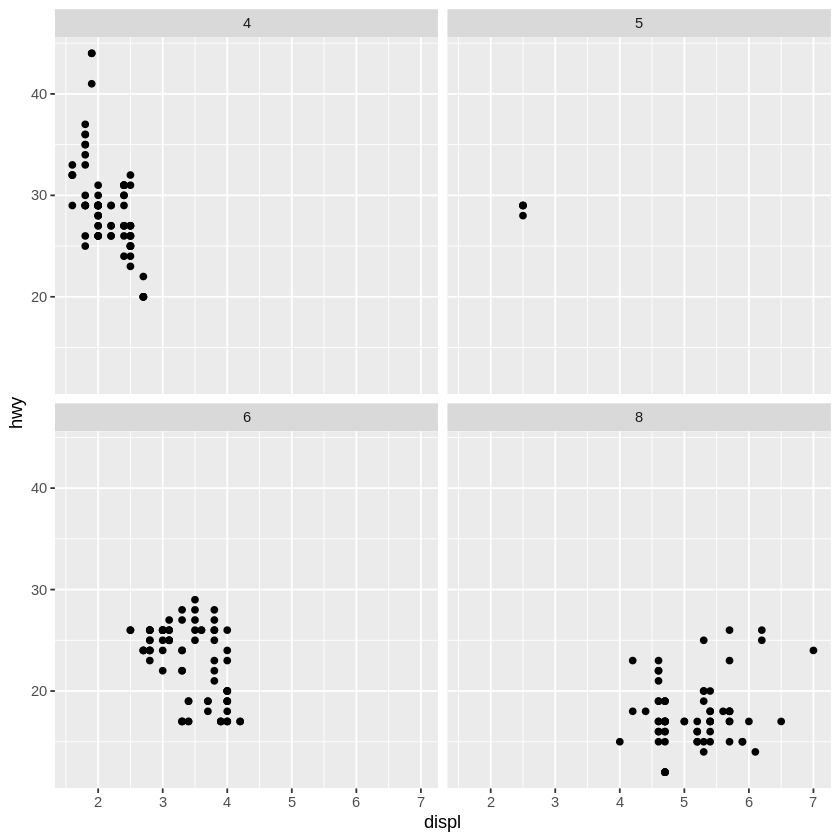

In [13]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~cyl)


To facet your plot on the combination of two variables, add `facet_grid()` to your plot call.
The first argument of `facet_grid()` is also a formula.
This time the formula should contain two variable names separated by a `~`.



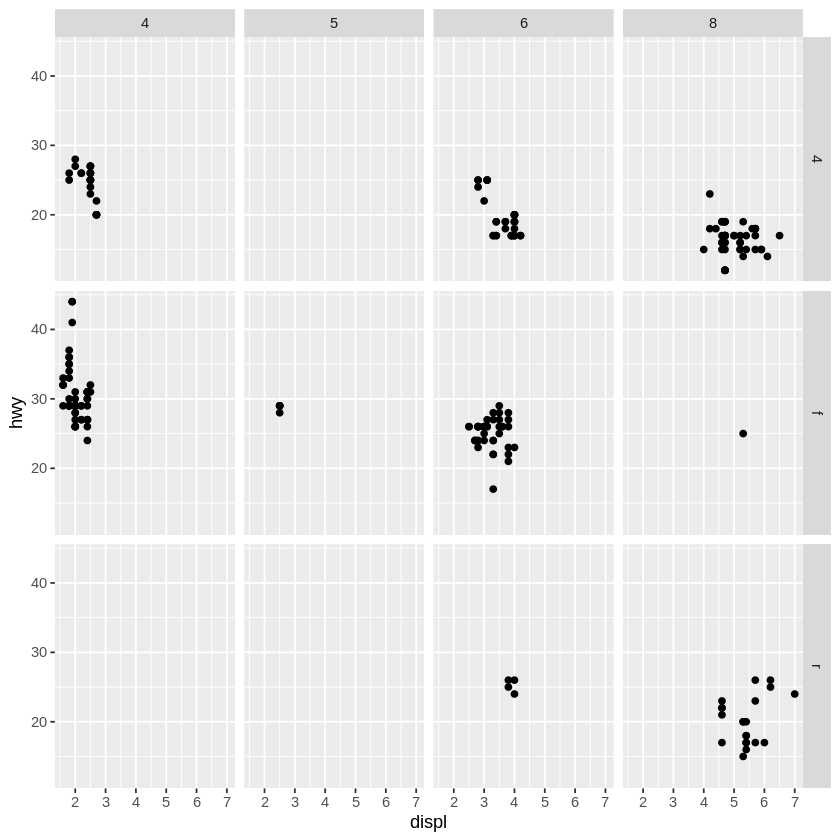

In [ ]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(drv ~ cyl)



If you prefer to not facet in the rows or columns dimension, use a `.` instead of a variable name, e.g. `+ facet_grid(. ~ cyl)`.

### Exercises

1.  What happens if you facet on a continuous variable?

2.  What do the empty cells in plot with `facet_grid(drv ~ cyl)` mean?
    How do they relate to this plot?

    ```r
    ggplot(data = mpg) + 
      geom_point(mapping = aes(x = drv, y = cyl))
    ```


3.  What plots does the following code make?
    What does `.` do?

    ```r
    ggplot(data = mpg) + 
     geom_point(mapping = aes(x = displ, y = hwy)) +
     facet_grid(drv ~ .)

    ggplot(data = mpg) + 
     geom_point(mapping = aes(x = displ, y = hwy)) +
     facet_grid(. ~ cyl)
    ```
    


4.  Take the first faceted plot in this section:

    ```r
    ggplot(data = mpg) + 
     geom_point(mapping = aes(x = displ, y = hwy)) + 
     facet_wrap(~ class, nrow = 2)
    ```


* What are the advantages to using faceting instead of the color aesthetic?
* What are the disadvantages?
* How might the balance change if you had a larger dataset?



5.  Read `?facet_wrap`.
    What does `nrow` do?
    What does `ncol` do?
    What other options control the layout of the individual panels?
    Why doesn't `facet_grid()` have `nrow` and `ncol` arguments?

6.  When using facet_grid() you should usually put the variable with more unique levels in the columns. Why?




## Geometric objects

How are these two plots similar?

<img src="https://d33wubrfki0l68.cloudfront.net/91aebc6de4de928abc810433b752274ba6a46d58/4e9f7/visualize_files/figure-html/unnamed-chunk-17-1.png" alt="img R" 
     width="500" height="300"  align="left" >

<img src="https://d33wubrfki0l68.cloudfront.net/43f153577e9c8e7f012c0606cbfbeb4d2e9ce409/17627/visualize_files/figure-html/unnamed-chunk-17-2.png" alt="img R" 
     width="500" height="300"  align="left" >




Both plots contain the same x variable, the same y variable, and both describe the same data.
But the plots are not identical.
Each plot uses a different visual object to represent the data.
In ggplot2 syntax, we say that they use different **geoms**.

A **geom** is the geometrical object that a plot uses to represent data.
People often describe plots by the type of geom that the plot uses.
For example, bar charts use bar geoms, line charts use line geoms, boxplots use boxplot geoms, and so on.
Scatterplots break the trend; they use the point geom.
As we see above, you can use different geoms to plot the same data.
The plot on the left uses the point geom, and the plot on the right uses the smooth geom, a smooth line fitted to the data.

To change the geom in your plot, change the geom function that you add to `ggplot()`.
For instance, to make the plots above, you can use this code:




```r
# left
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy))

# right
ggplot(data = mpg) + 
  geom_smooth(mapping = aes(x = displ, y = hwy))
```





Every geom function in ggplot2 takes a `mapping` argument.
However, not every aesthetic works with every geom.
You could set the shape of a point, but you couldn't set the "shape" of a line.
On the other hand, you *could* set the linetype of a line.
`geom_smooth()` will draw a different line, with a different linetype, for each unique value of the variable that you map to linetype.




`geom_smooth()` using method = 'loess' and formula 'y ~ x'



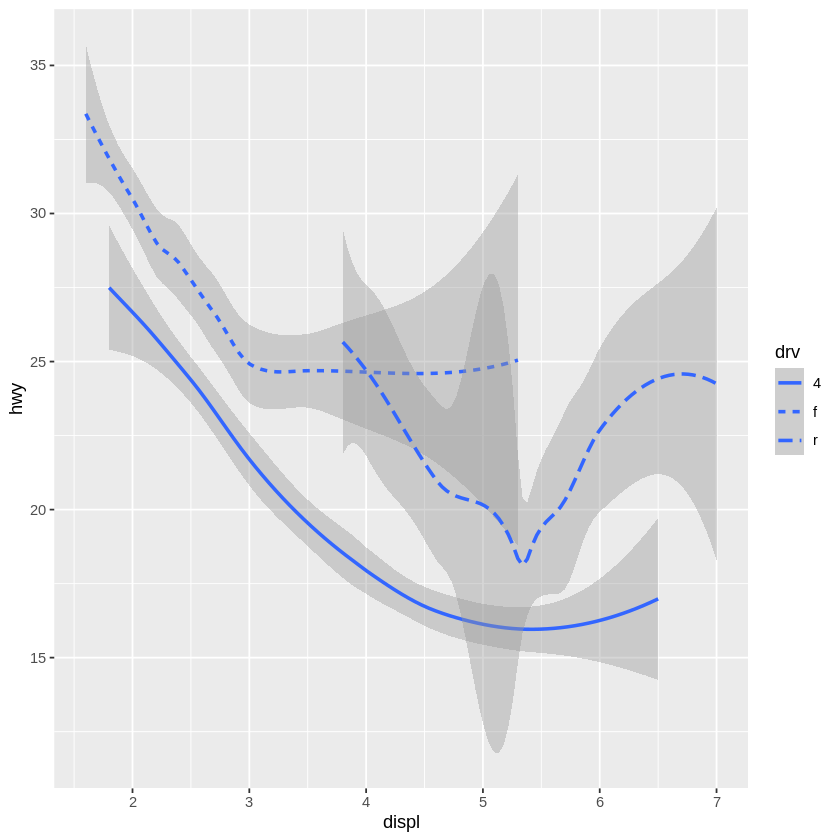

In [ ]:
ggplot(data = mpg) + 
  geom_smooth(mapping = aes(x = displ, y = hwy, linetype = drv))



Here, `geom_smooth()` separates the cars into three lines based on their `drv` value, which describes a car's drive train.
One line describes all of the points that have a `4` value, one line describes all of the points that have an `f` value, and one line describes all of the points that have an `r` value.
Here, `4` stands for four-wheel drive, `f` for front-wheel drive, and `r` for rear-wheel drive.

If this sounds strange, we can make it more clear by overlaying the lines on top of the raw data and then coloring everything according to `drv`.



`geom_smooth()` using method = 'loess' and formula 'y ~ x'



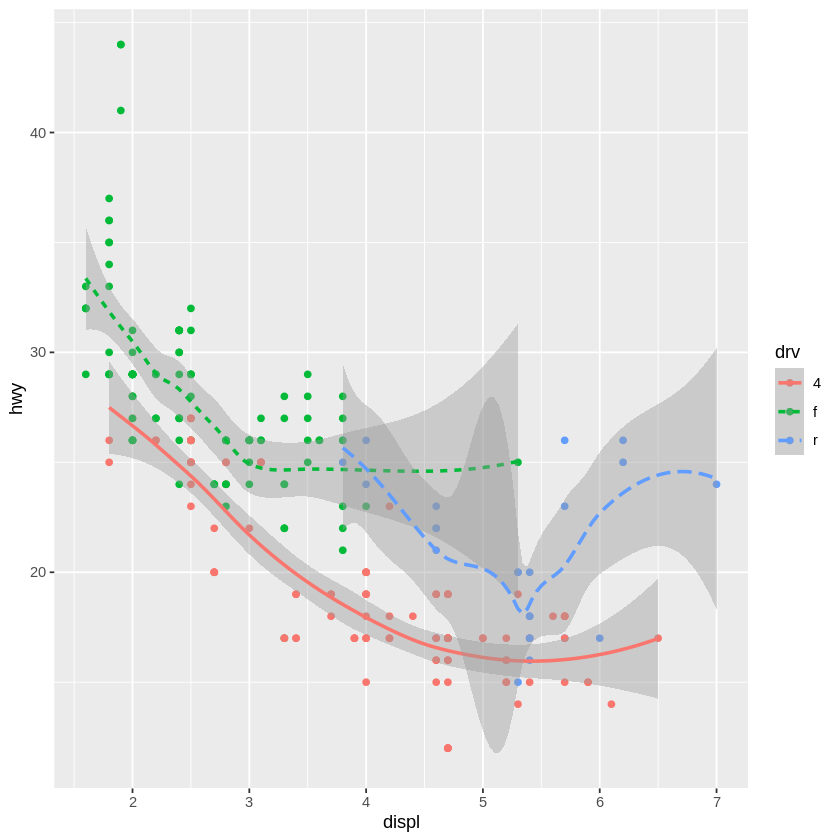

In [ ]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy, color = drv)) + 
  geom_point() +
  geom_smooth(mapping = aes(linetype = drv))


Notice that this plot contains two geoms in the same graph!
If this makes you excited, buckle up.
You will learn how to place multiple geoms in the same plot very soon.

ggplot2 provides more than 40 geoms, and extension packages provide even more (see <https://exts.ggplot2.tidyverse.org/gallery/> for a sampling).
The best way to get a comprehensive overview is the ggplot2 cheatsheet, which you can find at <http://rstudio.com/resources/cheatsheets>.
To learn more about any single geom, use the help (e.g. `?geom_smooth`).

Many geoms, like `geom_smooth()`, use a single geometric object to display multiple rows of data.
For these geoms, you can set the `group` aesthetic to a categorical variable to draw multiple objects.
ggplot2 will draw a separate object for each unique value of the grouping variable.
In practice, ggplot2 will automatically group the data for these geoms whenever you map an aesthetic to a discrete variable (as in the `linetype` example).
It is convenient to rely on this feature because the group aesthetic by itself does not add a legend or distinguishing features to the geoms.


```r
ggplot(data = mpg) +
  geom_smooth(mapping = aes(x = displ, y = hwy))

ggplot(data = mpg) +
  geom_smooth(mapping = aes(x = displ, y = hwy, group = drv))

ggplot(data = mpg) +
  geom_smooth(
    mapping = aes(x = displ, y = hwy, color = drv),
    show.legend = FALSE
  )
```

<img src="https://d33wubrfki0l68.cloudfront.net/498cf27e1ab09fb0f88823fb0447026492ae0c15/95b2c/visualize_files/figure-html/unnamed-chunk-21-1.png" alt="img R" 
     width="330" height="250"  align="left" >

<img src="https://d33wubrfki0l68.cloudfront.net/b3dd4727d3724ee297d97b826ce5c8b63e3c20cd/2a193/visualize_files/figure-html/unnamed-chunk-21-2.png" alt="img R" 
     width="330" height="250"  align="left" >

<img src="https://d33wubrfki0l68.cloudfront.net/5b179db1649be5e494a1294b4c0ba57d8fec25c1/7d618/visualize_files/figure-html/unnamed-chunk-21-3.png" alt="img R" 
     width="330" height="250"  align="left" >



To display multiple geoms in the same plot, add multiple geom functions to `ggplot()`:


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



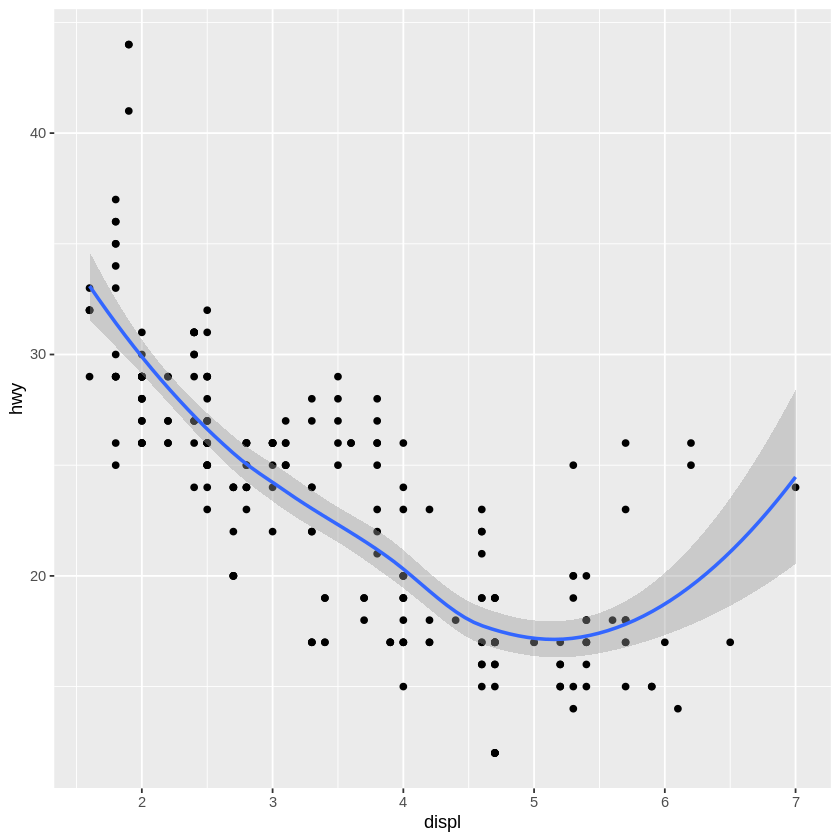

In [ ]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) +
  geom_smooth(mapping = aes(x = displ, y = hwy))



This, however, introduces some duplication in our code.
Imagine if you wanted to change the y-axis to display `cty` instead of `hwy`.
You'd need to change the variable in two places, and you might forget to update one.
You can avoid this type of repetition by passing a set of mappings to `ggplot()`.
ggplot2 will treat these mappings as global mappings that apply to each geom in the graph.
In other words, this code will produce the same plot as the previous code:



```r
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point() + 
  geom_smooth()
```


If you place mappings in a geom function, ggplot2 will treat them as local mappings for the layer.
It will use these mappings to extend or overwrite the global mappings *for that layer only*.
This makes it possible to display different aesthetics in different layers.


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



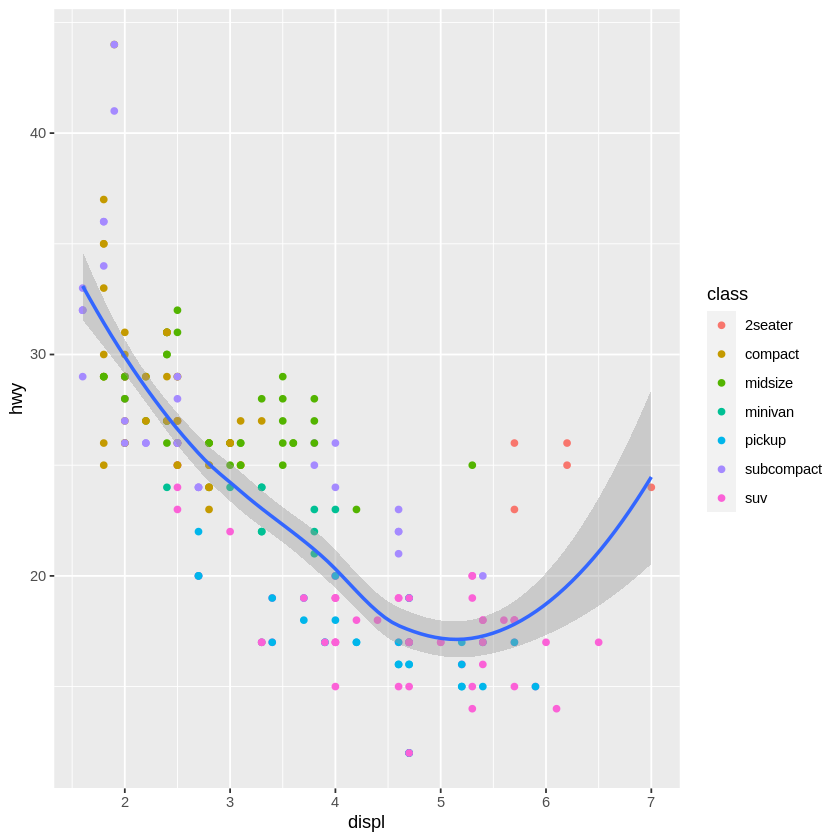

In [ ]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point(mapping = aes(color = class)) + 
  geom_smooth()



You can use the same idea to specify different `data` for each layer.
Here, our smooth line displays just a subset of the `mpg` dataset, the subcompact cars.
The local data argument in `geom_smooth()` overrides the global data argument in `ggplot()` for that layer only.



`geom_smooth()` using method = 'loess' and formula 'y ~ x'



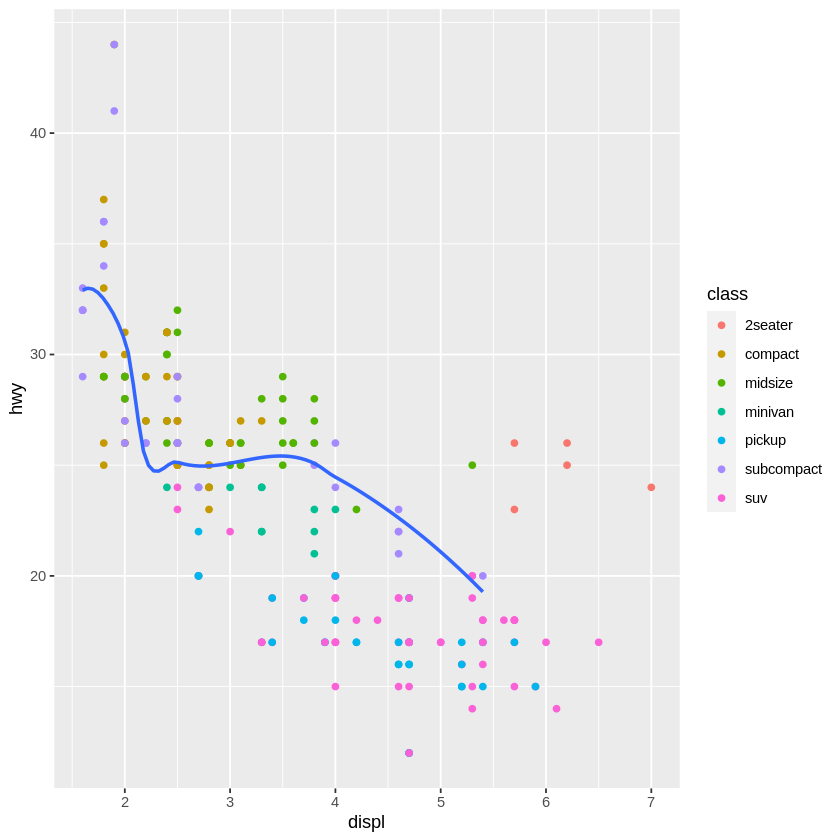

In [ ]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point(mapping = aes(color = class)) + 
  geom_smooth(data = filter(mpg, class == "subcompact"), se = FALSE)


(You'll learn how `filter()` works in the chapter on data transformations: for now, just know that this command selects only the subcompact cars.)

### Exercises

1.  What geom would you use to draw a line chart?
    A boxplot?
    A histogram?
    An area chart?

2.  Run this code in your head and predict what the output will look like.
    Then, run the code in R and check your predictions.

    ```r
    ggplot(data = mpg, mapping = aes(x = displ, y = hwy, color = drv)) + 
     geom_point() + 
     geom_smooth(se = FALSE)
    ```



3.  What does `show.legend = FALSE` do?
    What happens if you remove it?\

    Why do you think I used it earlier in the chapter?

4.  What does the `se` argument to `geom_smooth()` do?

5.  Will these two graphs look different?
    Why/why not?

    ```r
    ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
     geom_point() + 
     geom_smooth()

    ggplot() + 
     geom_point(data = mpg, mapping = aes(x = displ, y = hwy)) + 
     geom_smooth(data = mpg, mapping = aes(x = displ, y = hwy))
    ```


6.  Recreate the R code necessary to generate the following graphs.
    Note that wherever a categorical variable is used in the plot, it's `drv`.

<img src="https://d33wubrfki0l68.cloudfront.net/ed28a7c2ac21035afc0320f082324435c5bc7d32/b47f6/visualize_files/figure-html/unnamed-chunk-28-1.png" alt="img R" 
     width="500" height="300"  align="left" >

<img src="https://d33wubrfki0l68.cloudfront.net/e4e1d3f9256c683b5219f9dd0eee81d0320e9664/cc55f/visualize_files/figure-html/unnamed-chunk-28-2.png" alt="img R" 
     width="500" height="300"  align="left" >

<img src="https://d33wubrfki0l68.cloudfront.net/9ad169a7a48c6f1493bfb9eb1d89118975304cc2/df994/visualize_files/figure-html/unnamed-chunk-28-3.png" alt="img R" 
     width="500" height="300"  align="left" >

<img src="https://d33wubrfki0l68.cloudfront.net/90245d08b9e1077269e3a5e03288890bbb9b7f77/fb121/visualize_files/figure-html/unnamed-chunk-28-4.png" alt="img R" 
     width="500" height="300"  align="left" >

<img src="https://d33wubrfki0l68.cloudfront.net/9a3c63edfc170c576ec5d34faa90df2dc2a43443/7f9e5/visualize_files/figure-html/unnamed-chunk-28-5.png" alt="img R" 
     width="500" height="300"  align="left" >

<img src="https://d33wubrfki0l68.cloudfront.net/17638fddbddc7c85a667e1e0f30245a174ac4dd0/931c4/visualize_files/figure-html/unnamed-chunk-28-6.png" alt="img R" 
     width="500" height="300"  align="left" >


## Statistical transformations

Next, let's take a look at a bar chart.
Bar charts seem simple, but they are interesting because they reveal something subtle about plots.
Consider a basic bar chart, as drawn with `geom_bar()`.
The following chart displays the total number of diamonds in the `diamonds` dataset, grouped by `cut`.
The `diamonds` dataset is in the ggplot2 package and contains information on \~54,000 diamonds, including the `price`, `carat`, `color`, `clarity`, and `cut` of each diamond.
The chart shows that more diamonds are available with high quality cuts than with low quality cuts.


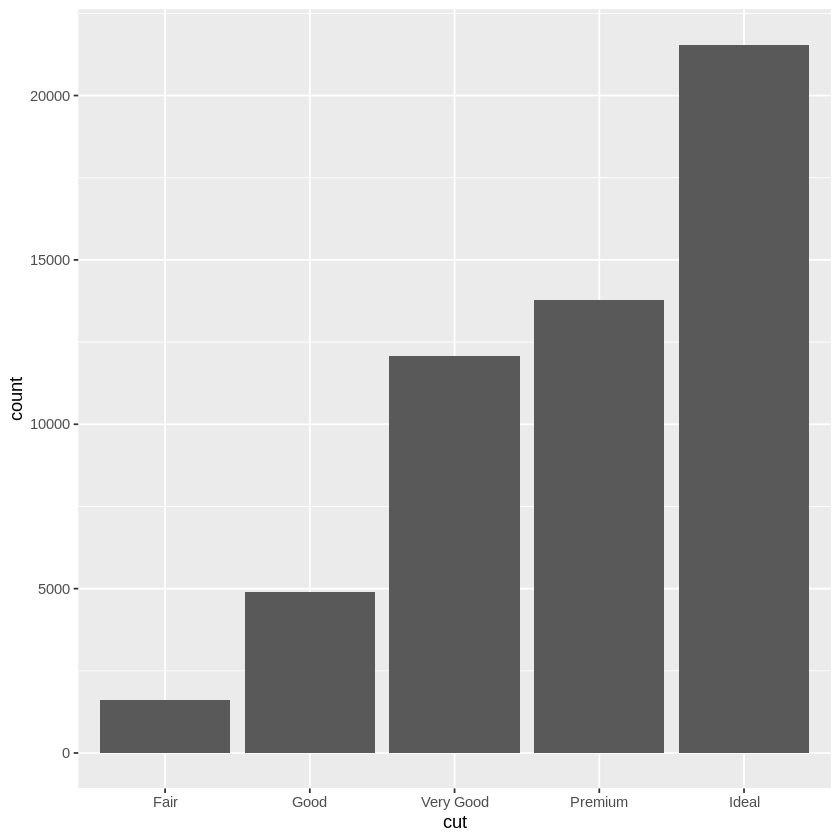

In [ ]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut))



On the x-axis, the chart displays `cut`, a variable from `diamonds`.
On the y-axis, it displays count, but count is not a variable in `diamonds`!
Where does count come from?
Many graphs, like scatterplots, plot the raw values of your dataset.
Other graphs, like bar charts, calculate new values to plot:

-   bar charts, histograms, and frequency polygons bin your data and then plot bin counts, the number of points that fall in each bin.

-   smoothers fit a model to your data and then plot predictions from the model.

-   boxplots compute a robust summary of the distribution and then display that summary as a specially formatted box.

The algorithm used to calculate new values for a graph is called a **stat**, short for statistical transformation.
The figure below describes how this process works with `geom_bar()`.


<center>
    <img src="https://d33wubrfki0l68.cloudfront.net/70a3b18a1128c785d8676a48c005ee9b6a23cc00/7283c/images/visualization-stat-bar.png" alt="img R" >
</center>




You can learn which stat a geom uses by inspecting the default value for the `stat` argument.
For example, `?geom_bar` shows that the default value for `stat` is "count", which means that `geom_bar()` uses `stat_count()`.
`stat_count()` is documented on the same page as `geom_bar()`.
If you scroll down, the section called "Computed variables" explains that it computes two new variables: `count` and `prop`.

You can generally use geoms and stats interchangeably.
For example, you can recreate the previous plot using `stat_count()` instead of `geom_bar()`:


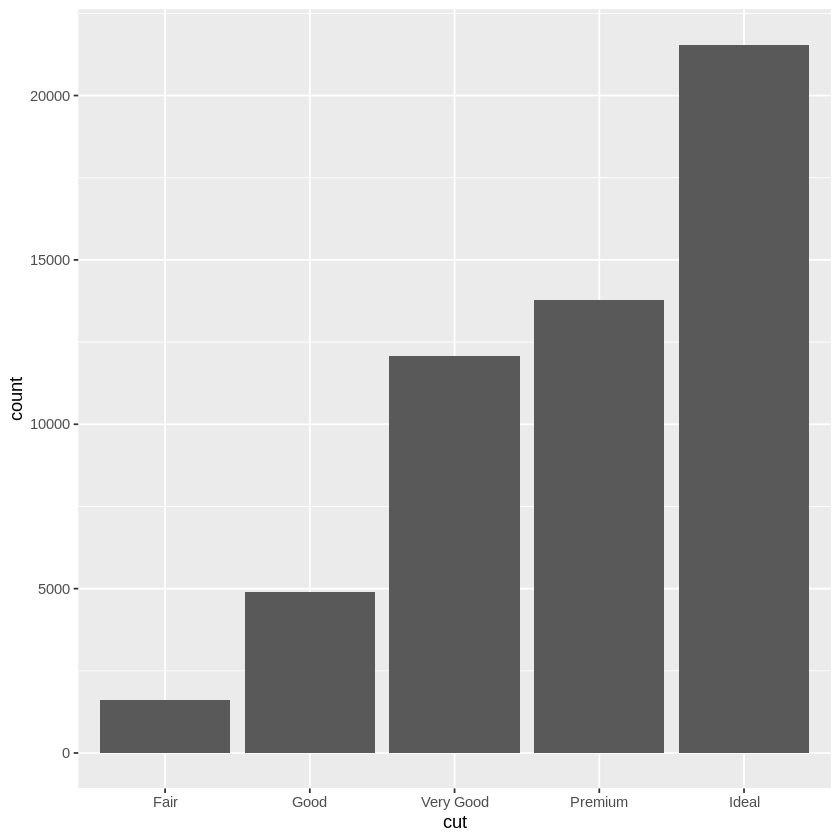

In [ ]:

ggplot(data = diamonds) + 
  stat_count(mapping = aes(x = cut))



This works because every geom has a default stat; and every stat has a default geom.
This means that you can typically use geoms without worrying about the underlying statistical transformation.
However, there are three reasons why you might need to use a stat explicitly:

1.  You might want to override the default stat.
    In the code below, I change the stat of `geom_bar()` from count (the default) to identity.
    This lets me map the height of the bars to the raw values of a $y$ variable.
    Unfortunately when people talk about bar charts casually, they might be referring to this type of bar chart, where the height of the bar is already present in the data, or the previous bar chart where the height of the bar is generated by counting rows.


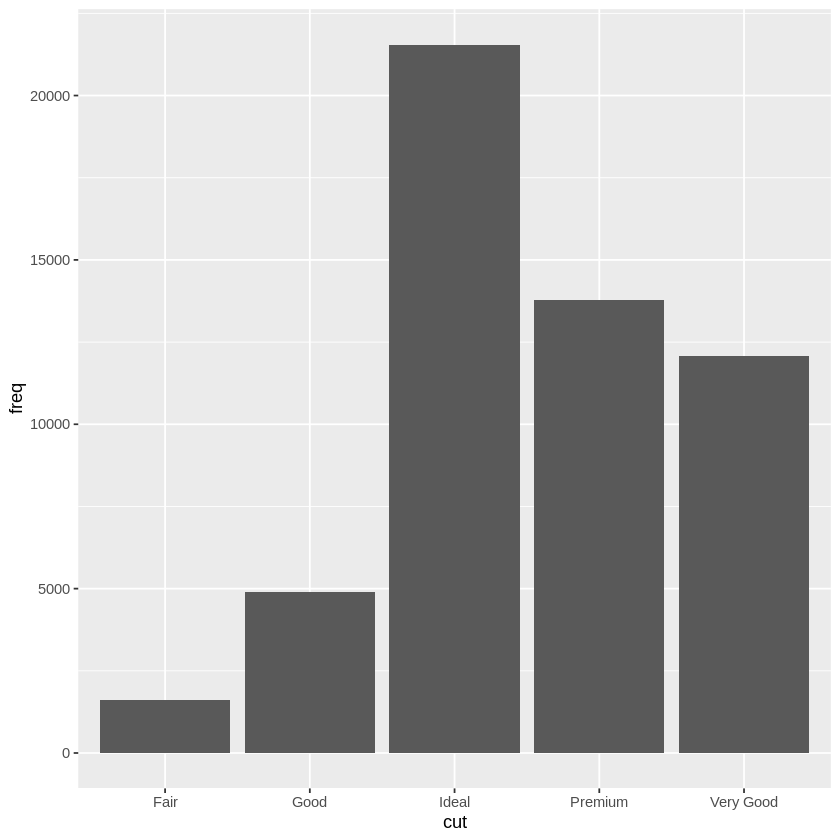

In [ ]:
demo <- tribble(
  ~cut,         ~freq,
  "Fair",       1610,
  "Good",       4906,
  "Very Good",  12082,
  "Premium",    13791,
  "Ideal",      21551
)

ggplot(data = demo) +
  geom_bar(mapping = aes(x = cut, y = freq), stat = "identity")


  (Don't worry that you haven't seen `<-` or `tribble()` before.
  You might be able to guess their meaning from the context, and you'll learn   exactly what they do soon!)

2.  You might want to override the default mapping from transformed variables to aesthetics.
    For example, you might want to display a bar chart of proportions, rather than counts:


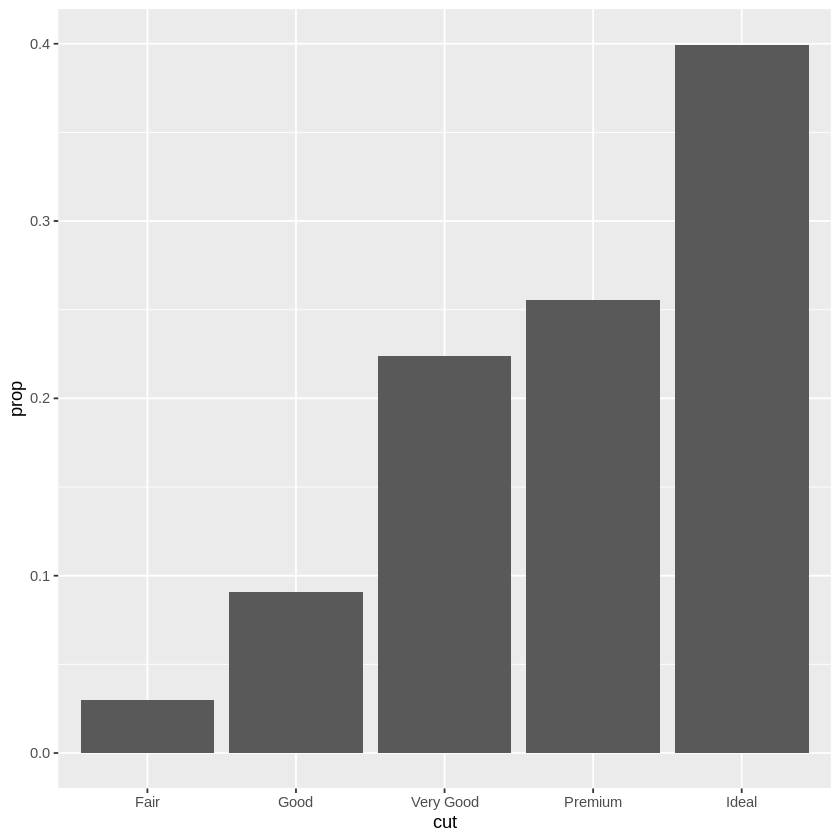

In [ ]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, y = after_stat(prop), group = 1))


To find the variables computed by the stat, look for the section titled "computed variables" in the help for `geom_bar()`.



3.  You might want to draw greater attention to the statistical transformation in your code.
    For example, you might use `stat_summary()`, which summarizes the y values for each unique x value, to draw attention to the summary that you're computing:


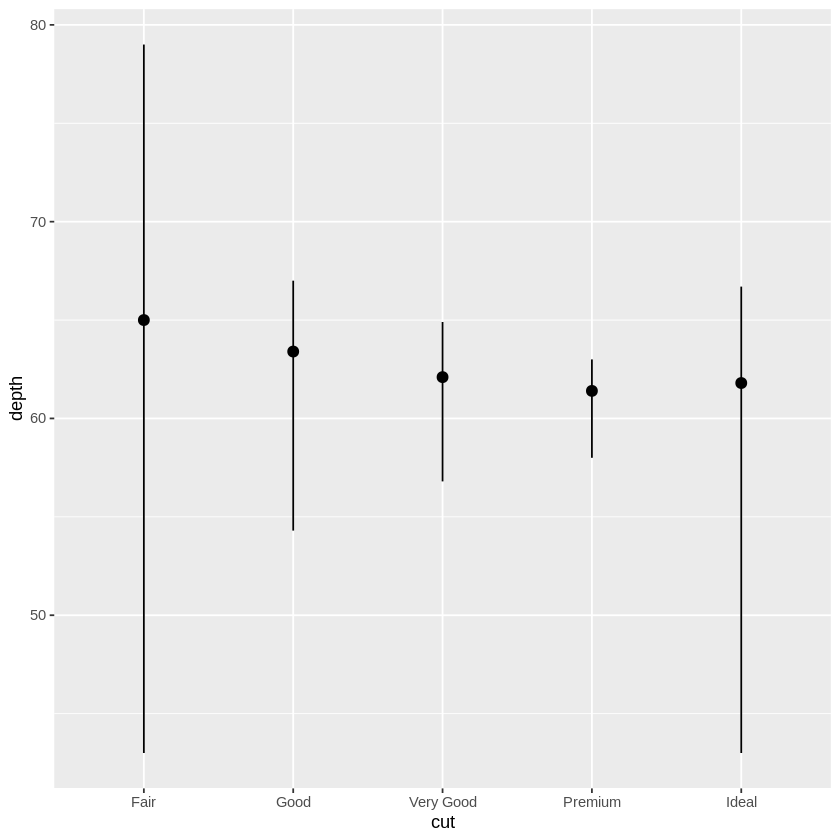

In [ ]:
ggplot(data = diamonds) + 
  stat_summary(
    mapping = aes(x = cut, y = depth),
    fun.min = min,
    fun.max = max,
    fun = median
  )


ggplot2 provides more than 20 stats for you to use.
Each stat is a function, so you can get help in the usual way, e.g. `?stat_bin`.
To see a complete list of stats, try the [ggplot2 cheatsheet](http://rstudio.com/resources/cheatsheets).





### Exercises

1.  What is the default geom associated with `stat_summary()`?
    How could you rewrite the previous plot to use that geom function instead of the stat function?

2.  What does `geom_col()` do?
    How is it different from `geom_bar()`?

3.  Most geoms and stats come in pairs that are almost always used in concert.
    Read through the documentation and make a list of all the pairs.
    What do they have in common?

4.  What variables does `stat_smooth()` compute?
    What parameters control its behaviour?

5.  In our proportion bar chart, we need to set `group = 1`.
    Why?
    In other words, what is the problem with these two graphs?

    ```r
    ggplot(data = diamonds) + 
     geom_bar(mapping = aes(x = cut, y = after_stat(prop)))
    ggplot(data = diamonds) + 
     geom_bar(mapping = aes(x = cut, fill = color, y = after_stat(prop)))
    ```


## Position adjustments

There's one more piece of magic associated with bar charts.
You can color a bar chart using either the `color` aesthetic, or, more usefully, `fill`:

```r
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, color = cut))
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = cut))
```


<img src="https://d33wubrfki0l68.cloudfront.net/32f8d7d22823068da65f3ebb57ba0d45b2e4b949/9599d/visualize_files/figure-html/unnamed-chunk-36-1.png" alt="img R" 
     width="500" height="300"  align="left" >

<img src="https://d33wubrfki0l68.cloudfront.net/2dae716dcaf549bc1f8483dfd50ed23a3996762c/7d18e/visualize_files/figure-html/unnamed-chunk-36-2.png" alt="img R" 
     width="500" height="300"  align="left" >



Note what happens if you map the fill aesthetic to another variable, like `clarity`: the bars are automatically stacked.
Each colored rectangle represents a combination of `cut` and `clarity`.


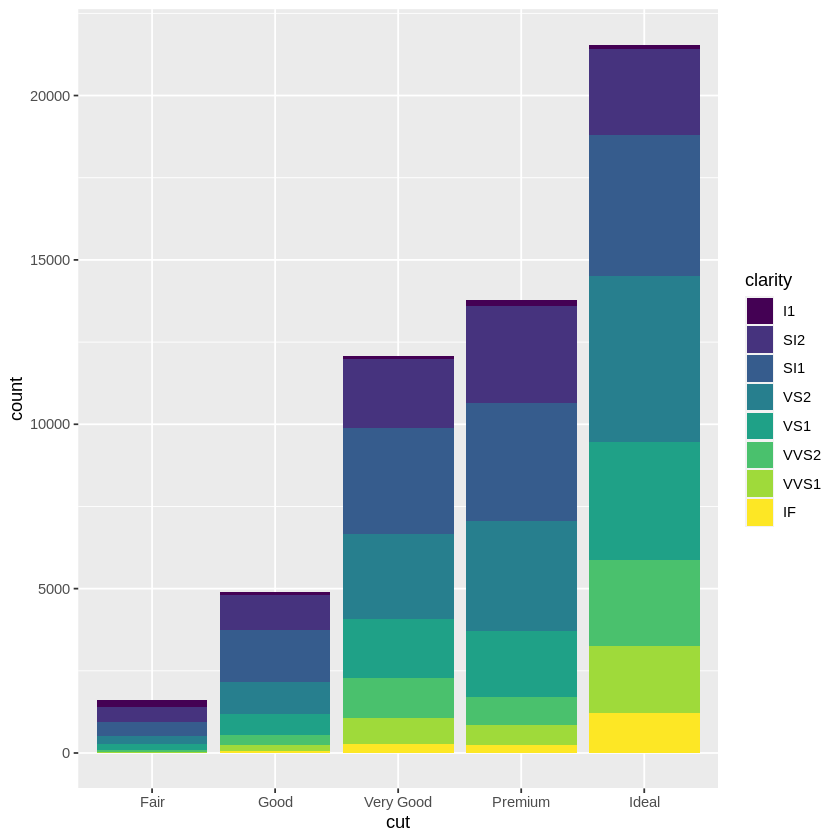

In [ ]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity))


The stacking is performed automatically using the **position adjustment** specified by the `position` argument.
If you don't want a stacked bar chart, you can use one of three other options: `"identity"`, `"dodge"` or `"fill"`.

-   `position = "identity"` will place each object exactly where it falls in the context of the graph.
    This is not very useful for bars, because it overlaps them.
    To see that overlapping we either need to make the bars slightly transparent by setting `alpha` to a small value, or completely transparent by setting `fill = NA`.

```r
ggplot(data = diamonds, mapping = aes(x = cut, fill = clarity)) + 
  geom_bar(alpha = 1/5, position = "identity")
ggplot(data = diamonds, mapping = aes(x = cut, color = clarity)) + 
  geom_bar(fill = NA, position = "identity")
```

<img src="https://d33wubrfki0l68.cloudfront.net/eeb585504858f548f4ed91a08a9ff159b7c6e86b/9ec57/visualize_files/figure-html/unnamed-chunk-38-1.png" alt="img R" 
     width="500" height="300"  align="left" >

<img src="https://d33wubrfki0l68.cloudfront.net/259eecdc6939ac6a634a2ac2dbd748a14ffbeb75/e6fcd/visualize_files/figure-html/unnamed-chunk-38-2.png" alt="img R" 
     width="500" height="300"  align="left" >


    The identity position adjustment is more useful for 2d geoms, like points, where it is the default.

-   `position = "fill"` works like stacking, but makes each set of stacked bars the same height.
    This makes it easier to compare proportions across groups.


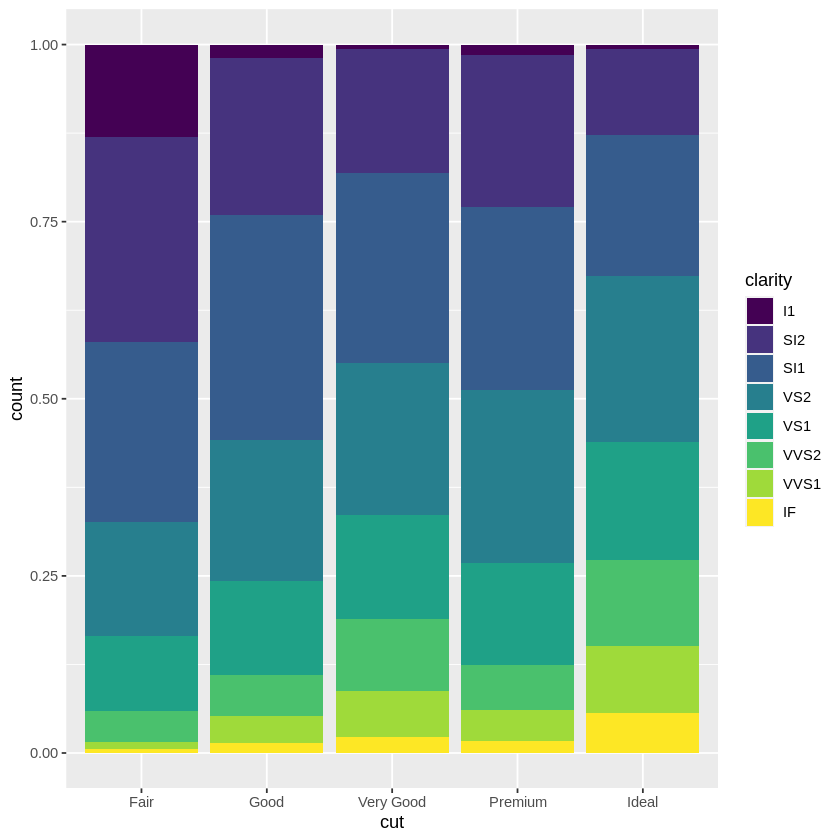

In [ ]:

ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "fill")


-   `position = "dodge"` places overlapping objects directly *beside* one another.
    This makes it easier to compare individual values.


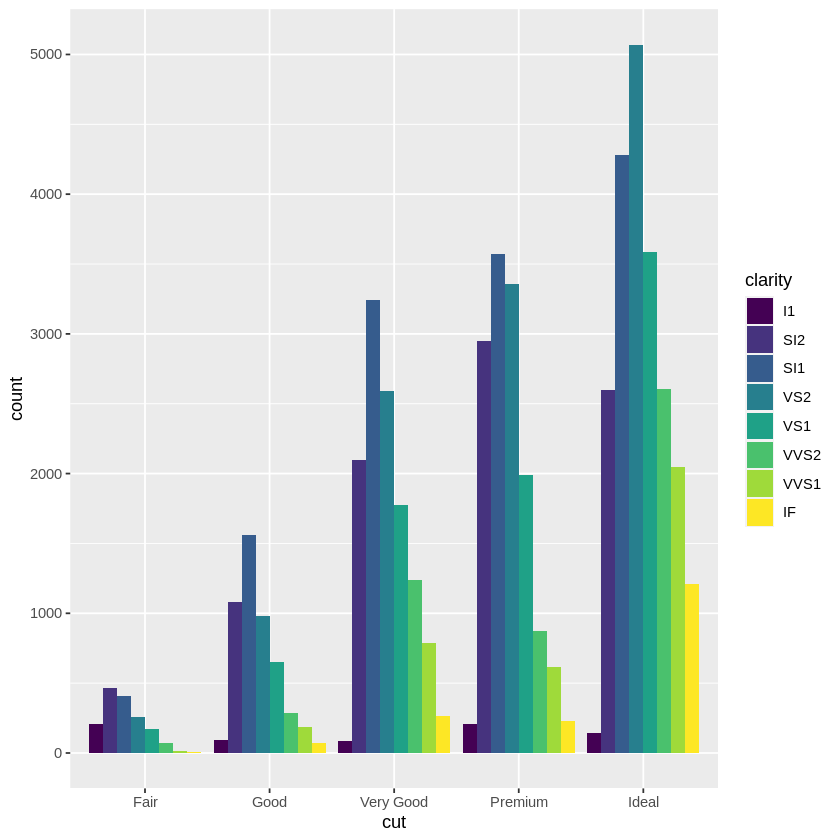

In [ ]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "dodge")


There's one other type of adjustment that's not useful for bar charts, but can be very useful for scatterplots.
Recall our first scatterplot.
Did you notice that the plot displays only 126 points, even though there are 234 observations in the dataset?


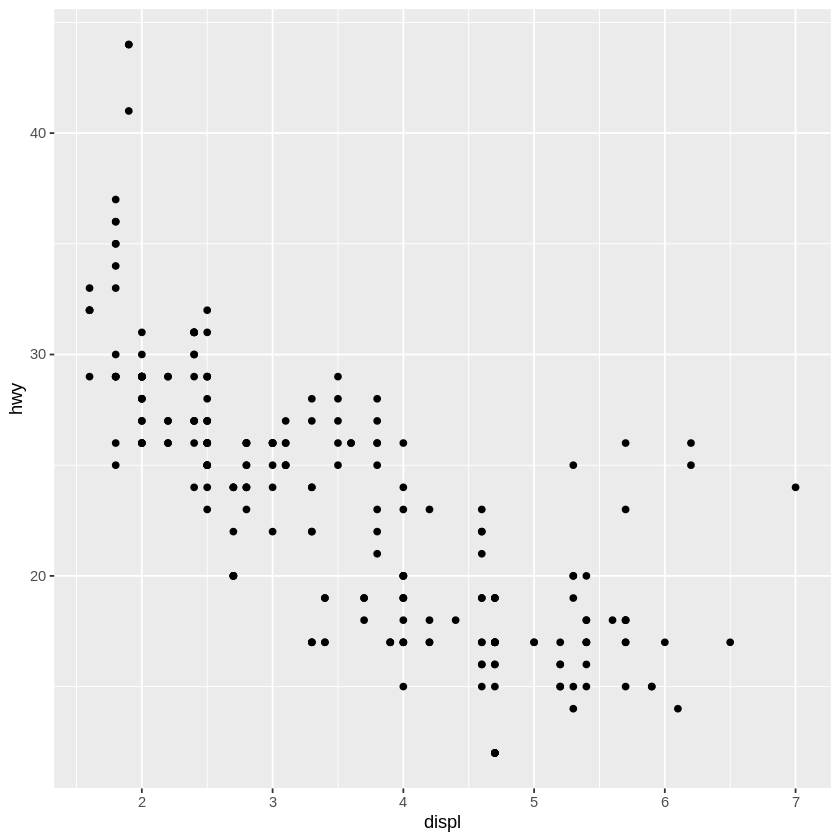

In [ ]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy))


The underlying values of `hwy` and `displ` are rounded so the points appear on a grid and many points overlap each other.
This problem is known as **overplotting**.
This arrangement makes it difficult to see the distribution of the data.
Are the data points spread equally throughout the graph, or is there one special combination of `hwy` and `displ` that contains 109 values?

You can avoid this gridding by setting the position adjustment to "jitter".
`position = "jitter"` adds a small amount of random noise to each point.
This spreads the points out because no two points are likely to receive the same amount of random noise.


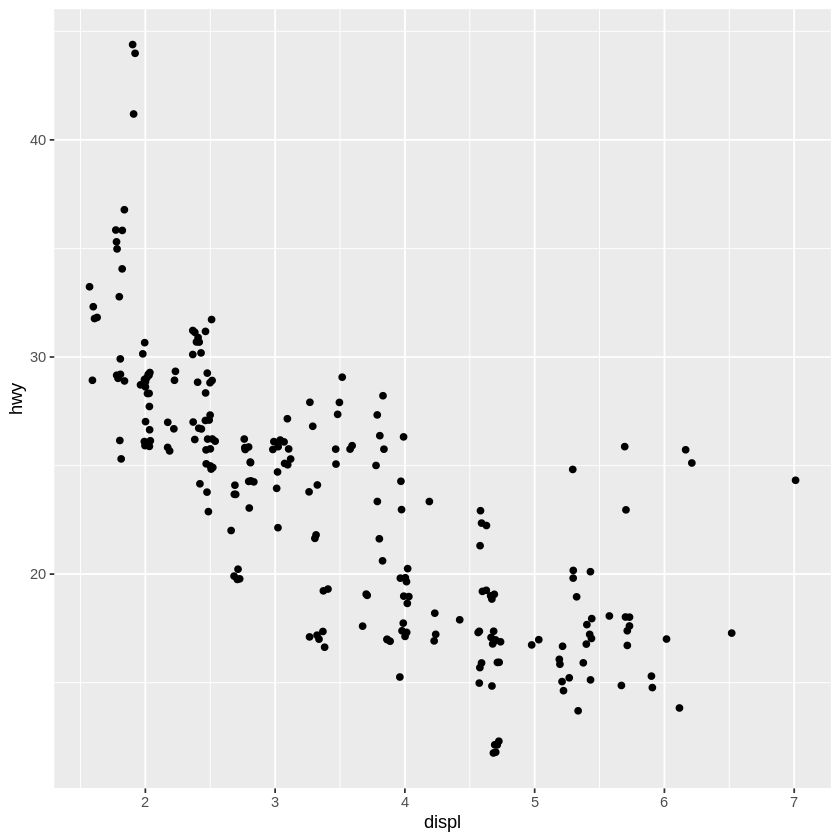

In [ ]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy), position = "jitter")


Adding randomness seems like a strange way to improve your plot, but while it makes your graph less accurate at small scales, it makes your graph *more* revealing at large scales.
Because this is such a useful operation, ggplot2 comes with a shorthand for `geom_point(position = "jitter")`: `geom_jitter()`.

To learn more about a position adjustment, look up the help page associated with each adjustment: `?position_dodge`, `?position_fill`, `?position_identity`, `?position_jitter`, and `?position_stack`.

### Exercises

1.  What is the problem with this plot?
    How could you improve it?


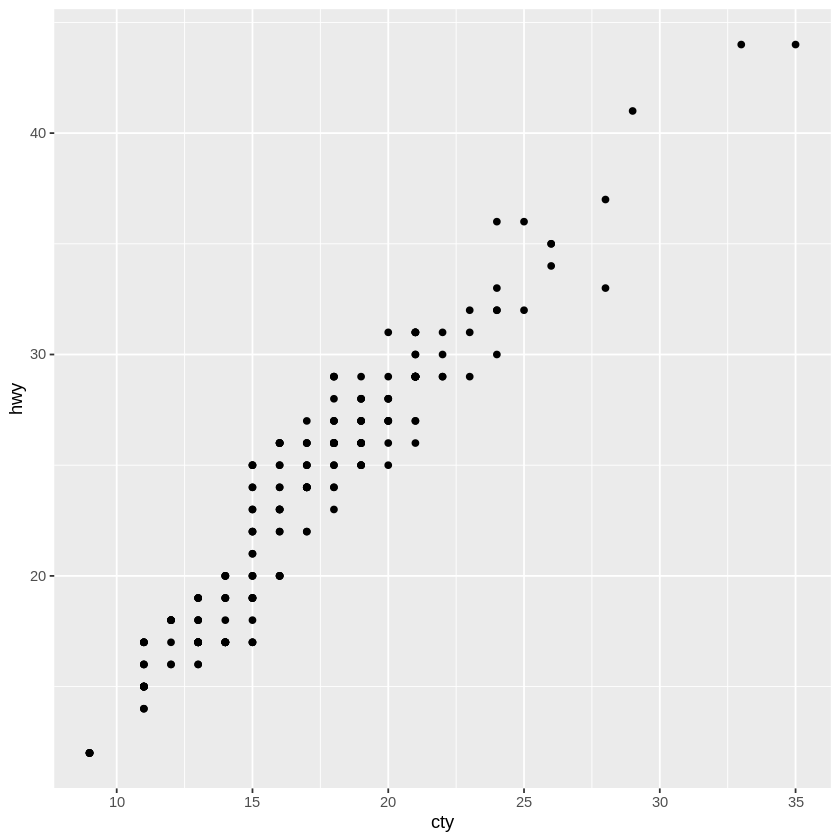

In [ ]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) + 
  geom_point()


2.  What parameters to `geom_jitter()` control the amount of jittering?

3.  Compare and contrast `geom_jitter()` with `geom_count()`.

4.  What's the default position adjustment for `geom_boxplot()`?
    Create a visualization of the `mpg` dataset that demonstrates it.

## Coordinate systems

Coordinate systems are probably the most complicated part of ggplot2.
The default coordinate system is the Cartesian coordinate system where the x and y positions act independently to determine the location of each point.
There are a three other coordinate systems that are occasionally helpful.

-   `coord_flip()` switches the x and y axes.
    This is useful (for example), if you want horizontal boxplots.
    It's also useful for long labels: it's hard to get them to fit without overlapping on the x-axis.


```r
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) + 
  geom_boxplot()
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) + 
  geom_boxplot() +
  coord_flip()
```

<img src="https://d33wubrfki0l68.cloudfront.net/5149a170c2e44c011821ab62eb9726b64306ee0d/a2d87/visualize_files/figure-html/unnamed-chunk-44-1.png" alt="img R" 
     width="500" height="300"  align="left" >

<img src="https://d33wubrfki0l68.cloudfront.net/602d8730abbe8847ffd080e593464cf48a914219/15cad/visualize_files/figure-html/unnamed-chunk-44-2.png" alt="img R" 
     width="500" height="300"  align="left" >


-   `coord_quickmap()` sets the aspect ratio correctly for maps.
    This is very important if you're plotting spatial data with ggplot2 (which unfortunately we don't have the space to cover in this book).


```r
install.packages("maps")
library("maps")

nz <- map_data("nz")


ggplot(nz, aes(long, lat, group = group)) +
  geom_polygon(fill = "white", colour = "black")

ggplot(nz, aes(long, lat, group = group)) +
  geom_polygon(fill = "white", colour = "black") +
  coord_quickmap()
```

<img src="https://d33wubrfki0l68.cloudfront.net/3400136e9d71c292116608cca354dd498f4b3934/b771c/visualize_files/figure-html/unnamed-chunk-45-1.png" alt="img R" 
     width="500" height="300"  align="left" >

<img src="https://d33wubrfki0l68.cloudfront.net/93e04d42a3e518fa4a4c131f54b480fdd30aa0a4/3cc14/visualize_files/figure-html/unnamed-chunk-45-2.png" alt="img R" 
     width="500" height="300"  align="left" >


-   `coord_polar()` uses polar coordinates.
    Polar coordinates reveal an interesting connection between a bar chart and a Coxcomb chart.


```r
bar <- ggplot(data = diamonds) + 
  geom_bar(
    mapping = aes(x = cut, fill = cut), 
    show.legend = FALSE,
    width = 1
  ) + 
  theme(aspect.ratio = 1) +
  labs(x = NULL, y = NULL)

bar + coord_flip()
bar + coord_polar()
```

<img src="https://d33wubrfki0l68.cloudfront.net/c79e2bf43aa0af4b548be5f3663556b49cf80f0b/b2a69/visualize_files/figure-html/unnamed-chunk-46-1.png" alt="img R" 
     width="500" height="300"  align="left" >

<img src="https://d33wubrfki0l68.cloudfront.net/0e359da327061b10a99ff4d50c02a172fd8d5ac4/d9458/visualize_files/figure-html/unnamed-chunk-46-2.png" alt="img R" 
     width="500" height="300"  align="left" >


### Exercises

1.  Turn a stacked bar chart into a pie chart using `coord_polar()`.

2.  What does `labs()` do?
    Read the documentation.

3.  What's the difference between `coord_quickmap()` and `coord_map()`?

4.  What does the plot below tell you about the relationship between city and highway mpg?
    Why is `coord_fixed()` important?
    What does `geom_abline()` do?


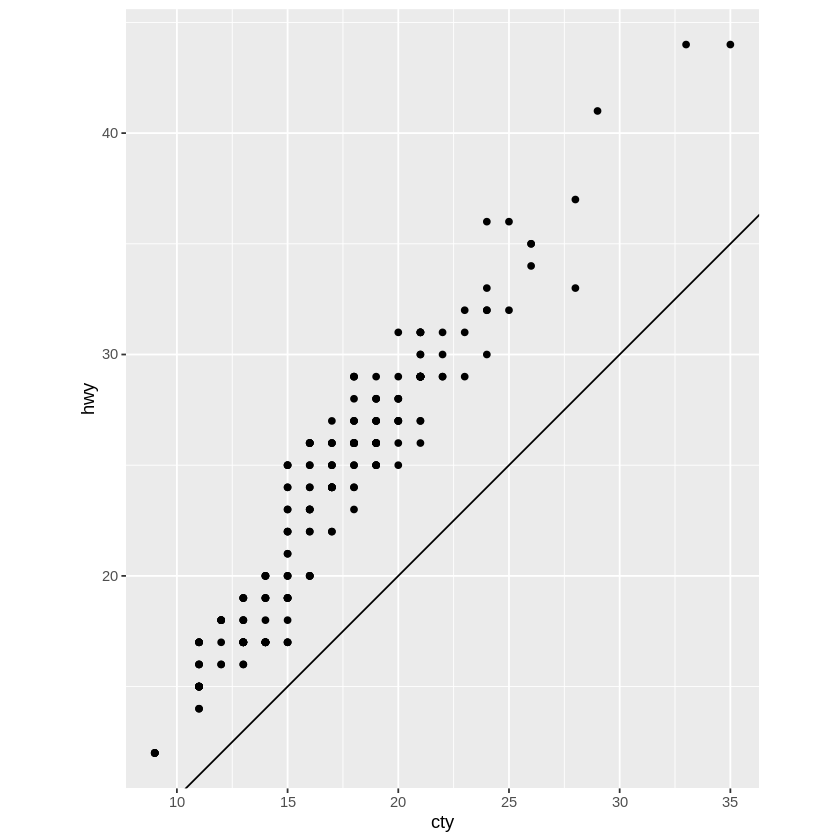

In [ ]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) +
  geom_point() + 
  geom_abline() +
  coord_fixed()


## The layered grammar of graphics

In the previous sections, you learned much more than just how to make scatterplots, bar charts, and boxplots.
You learned a foundation that you can use to make *any* type of plot with ggplot2.
To see this, let's add position adjustments, stats, coordinate systems, and faceting to our code template:

```r
    ggplot(data = <DATA>) + 
      <GEOM_FUNCTION>(
         mapping = aes(<MAPPINGS>),
         stat = <STAT>, 
         position = <POSITION>
      ) +
      <COORDINATE_FUNCTION> +
      <FACET_FUNCTION>
```

Our new template takes seven parameters, the bracketed words that appear in the template.
In practice, you rarely need to supply all seven parameters to make a graph because ggplot2 will provide useful defaults for everything except the data, the mappings, and the geom function.

The seven parameters in the template compose the grammar of graphics, a formal system for building plots.
The grammar of graphics is based on the insight that you can uniquely describe *any* plot as a combination of a dataset, a geom, a set of mappings, a stat, a position adjustment, a coordinate system, and a faceting scheme.

To see how this works, consider how you could build a basic plot from scratch: you could start with a dataset and then transform it into the information that you want to display (with a stat).




<center>
    <img src="https://d33wubrfki0l68.cloudfront.net/d0509055ae83fd3fdac92d03642441386e382f39/6f4ff/images/visualization-grammar-1.png" alt="img R"  >

</center>




Next, you could choose a geometric object to represent each observation in the transformed data.
You could then use the aesthetic properties of the geoms to represent variables in the data.
You would map the values of each variable to the levels of an aesthetic.


<center>
    <img src="https://d33wubrfki0l68.cloudfront.net/1893b4624cb3eacb925eba80868e3e1023fc2855/09d50/images/visualization-grammar-2.png" alt="img R"  >

</center>



You'd then select a coordinate system to place the geoms into, using the location of the objects (which is itself an aesthetic property) to display the values of the x and y variables.
At that point, you would have a complete graph, but you could further adjust the positions of the geoms within the coordinate system (a position adjustment) or split the graph into subplots (faceting).
You could also extend the plot by adding one or more additional layers, where each additional layer uses a dataset, a geom, a set of mappings, a stat, and a position adjustment.

<center>
    <img src="https://d33wubrfki0l68.cloudfront.net/368a11a4f4e801c251ed1835643a0dfa85a3e2b7/1323b/images/visualization-grammar-3.png" alt="img R"  >

</center>

You could use this method to build *any* plot that you imagine.
In other words, you can use the code template that you've learned in this chapter to build hundreds of thousands of unique plots.
